In [1]:
import csv
import numpy as np
from numpy import savetxt
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
#Parameters
##System parameters 

theta = 0.5
steps = 10
time_step = 0.01
t = np.linspace(0, steps, int(steps/time_step))
g_init = 6 #initial bifurcation param
noise = 0.02

# initial state of 3-node system
y_1_0 = 0
y_2_0 = 0
y_3_0 =0
y_init = (y_1_0, y_2_0, y_2_0)

# stimulation parameters
z_init = 0


In [2]:
! pip install -U notebook-as-pdf

  Using cached notebook_as_pdf-0.5.0-py3-none-any.whl (6.5 kB)
  Using cached nbconvert-6.1.0-py3-none-any.whl (551 kB)
  Using cached PyPDF2-1.26.0.tar.gz (77 kB)
  Using cached pyppeteer-0.2.6-py3-none-any.whl (83 kB)
  Using cached traitlets-5.1.0-py3-none-any.whl (101 kB)
  Using cached nbclient-0.5.4-py3-none-any.whl (66 kB)
  Using cached nbformat-5.1.3-py3-none-any.whl (178 kB)
  Using cached pandocfilters-1.5.0-py2.py3-none-any.whl (8.7 kB)
  Using cached Jinja2-3.0.1-py3-none-any.whl (133 kB)
  Using cached bleach-4.1.0-py2.py3-none-any.whl (157 kB)
  Using cached jupyterlab_pygments-0.1.2-py2.py3-none-any.whl (4.6 kB)
  Using cached jupyter_core-4.8.1-py3-none-any.whl (86 kB)
  Using cached Pygments-2.10.0-py3-none-any.whl (1.0 MB)
  Using cached testpath-0.5.0-py3-none-any.whl (84 kB)
  Using cached entrypoints-0.3-py2.py3-none-any.whl (11 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
  Using cached mistune-0.8.4-py2.py3-none-any.whl (16 kB)
  Using cached

In [3]:
! pyppeteer-install

[W:pyppeteer.command] chromium is already installed.


In [3]:
#Functions describing nodes' relationship 

def f_inh(y, theta, g):   #Inhibition
    y_new = theta**g/(y**g+theta**g)
    return y_new                  #monotonically decreasing sigmoidal function
    
    
    
def f_ex(y,theta,g): #Exitation
    y_new = y**g/(y**g+theta**g)
    return y_new              #monotonically increasing sigmoidal function
    

In [4]:
#Network model

def three_nodes_model(y_init, t, g=4, theta= 0.5):
        
        
        y_1_dot = f_inh(y_init[2],theta,g) - y_init[0]
        y_2_dot = f_ex(y_init[0], theta,g) - y_init[1]
        y_3_dot = f_ex(y_init[1], theta,g) - y_init[2]
        
        return  y_1_dot,  y_2_dot,  y_3_dot
        

In [5]:
model_values = integrate.odeint(three_nodes_model, y_init, t)

In [47]:
np.count_nonzero(np.isnan(model_values))

2677530

In [48]:
#ToDo: Create data set with random g, thus random oscilattions. 

#for i in range(100):
#  g = np.random.uniform(0,4)
    

In [49]:
# Save as csv 
#savetxt('data.csv', model_values, delimiter=',')

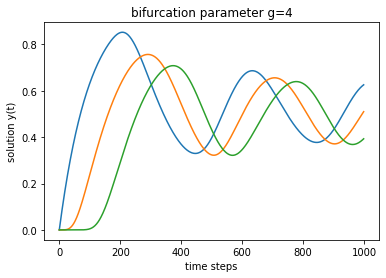

In [8]:
plt.plot(model_values)
plt.ylabel('solution y(t)')
plt.xlabel('time steps')
plt.title("bifurcation parameter g=4")
plt.show()

In [ ]:
#Stimulation

def stimulation(g_init, z_init, t_c):
    z_dot = (-1/t_c)*z[i]
    #then inegrate z 
    g[i] = g_init-z
    return g[i]

In [ ]:
model_values